# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
'''
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()'''

'\n%matplotlib inline\n\nfrom IPython.core.pylabtools import figsize\n\n\nfigsize(12, 8)\n\nsns.set()'

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=3000, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [6]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [7]:
# Sua análise começa aqui.
peso =get_sample(athletes.dropna(),'weight')
altura = get_sample(athletes.dropna(), 'height')

df = pd.DataFrame()
df['peso'],df['altura'] = peso,altura
df.reset_index(drop = True, inplace = True)
df.head()

,peso,altura
0,72.0,1.77
1,98.0,1.94
2,59.0,1.60
3,101.0,2.09
4,90.0,1.81


In [8]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import ttest_ind

shapiro_stat , shapiro_p_value = shapiro(df['peso'])
shapiro_stat1 , shapiro_p_value1 = shapiro(df['altura'])
print('--------------------Peso-----------------------------')
print(f"O valor estatistico de Shapiro-Wilk = {shapiro_stat}")
print(f"O P-valor para  Shapiro-Wilk = {shapiro_p_value}")
print('--------------------Altura-----------------------------')
print(f"O valor estatistico de Shapiro-Wilk = {shapiro_stat1}")
print(f"O P-valor para  Shapiro-Wilk = {shapiro_p_value1}")

--------------------Peso-----------------------------
O valor estatistico de Shapiro-Wilk = 0.9568493962287903
O P-valor para  Shapiro-Wilk = 6.002807061920406e-29
--------------------Altura-----------------------------
O valor estatistico de Shapiro-Wilk = 0.9967695474624634
O P-valor para  Shapiro-Wilk = 5.049732408224372e-06


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [9]:
def q1():
    # Retorne aqui o resultado da questão 1.
    shapiro_stat1 , shapiro_p_value1 = shapiro(df['altura'])
    if (shapiro_p_value1 > 0.05):
        return True
    return False

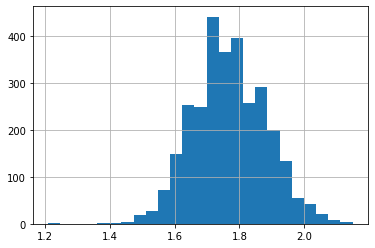

In [10]:
df['altura'].hist(bins=25)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que? 
  - Os dados não tem uma distribuição normal no teste de 5% de significancia, apesar de parecer via histograma.
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).
  - O teste de 0.000005% de significancia apresenta uma distribuição normal. 

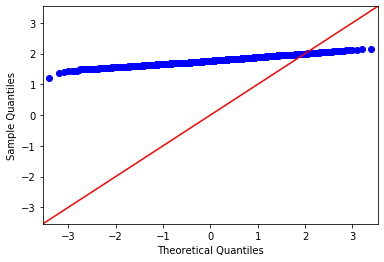

In [11]:
import statsmodels.api as sm 
import pylab as py 
sm.qqplot(df['altura'], line ='45') 
py.show() 

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
jarque_bera_stat , jarque_p_value = jarque_bera(df['peso'])
jarque_bera_stat1 , jarque_p_value1 = jarque_bera(df['altura'])
print('--------------------Peso-----------------------------')
print(f"O valor estatistico de Jarque-Bera = {jarque_bera_stat}")
print(f"O P-valor para  Jarque-Bera = {jarque_p_value}")
print('--------------------Altura-----------------------------')
print(f"O valor estatistico de Jarque-Bera = {jarque_bera_stat1}")
print(f"O P-valor para  Jarque-Bera = {jarque_p_value1}")

--------------------Peso-----------------------------
O valor estatistico de Jarque-Bera = 662.3016591343653
O P-valor para  Jarque-Bera = 0.0
--------------------Altura-----------------------------
O valor estatistico de Jarque-Bera = 5.732066973788013
O P-valor para  Jarque-Bera = 0.056924270234052


In [13]:
def q2():
    # Retorne aqui o resultado da questão 2.
    jarque_bera_stat1 , jarque_p_value1 = jarque_bera(df['altura'])
    if (jarque_p_value1 > 0.05):
        return False
    return True

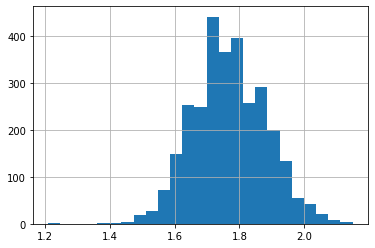

In [14]:
df['altura'].hist(bins=25)

In [15]:
df[['altura']].describe()

,altura
count,3000.000000
mean,1.768440
std,0.112447
min,1.210000
25%,1.690000
50%,1.760000
75%,1.850000
max,2.150000


__Para refletir__:

* Esse resultado faz sentido?
   - Não pois o sino não está simetrico e está levemente inclinado para a direita, conforme visto no qq-plot a distribuição não é normal.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [16]:
normaltest_stat , normaltest_p_value = normaltest(df['peso'])

print('--------------------Peso-----------------------------')
print(f"O valor estatistico de normaltest = {normaltest_stat}")
print(f"O P-valor para  normaltest = {normaltest_p_value}")

--------------------Peso-----------------------------
O valor estatistico de normaltest = 403.8976166110218
O P-valor para  normaltest = 1.9712736919456068e-88


In [17]:
def q3():
    # Retorne aqui o resultado da questão 3.
    normaltest_stat , normaltest_p_value = normaltest(df['peso'])
    if (normaltest_p_value > 0.05):
        return True
    return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que? 
    - Sim, são condizentes, retornando uma falsa normalidade, se olhar o box plot é possivel perceber a presenca de outliers apenas dos valores mais altos e ainda no histograma uma distribuição que não se assemelha ao formato de sino.
* Um _box plot_ também poderia ajudar a entender a resposta.

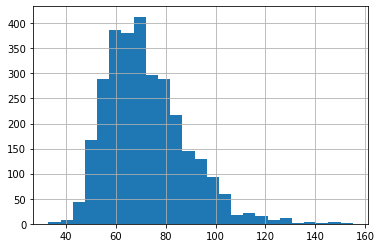

In [18]:
df['peso'].hist(bins = 25)

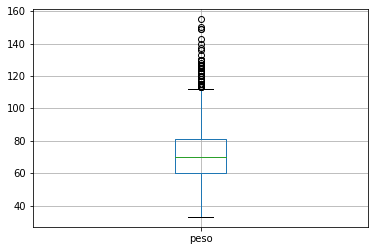

In [19]:
df.boxplot(column=['peso'])

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [20]:
df1 = df[['peso']].apply(np.log)
normaltest_stat , normaltest_p_value = normaltest(df1['peso'])
print('--------------------Peso-----------------------------')
print(f"O valor estatistico de normaltest = {normaltest_stat}")
print(f"O P-valor para  normaltest = {normaltest_p_value}")

--------------------Peso-----------------------------
O valor estatistico de normaltest = 27.331659143598
O P-valor para  normaltest = 1.1614636606447438e-06


In [21]:
def q4():
    # Retorne aqui o resultado da questão 4.
    df1 = df[['peso']].apply(np.log)
    normaltest_stat , normaltest_p_value = normaltest(df1['peso'])
    if (normaltest_p_value > 0.05):
        return True
    return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
    - Não, o gráfico apresenta formato de sino mas o resultado não satisfaz uma forma normal.
* Você esperava um resultado diferente agora?
    - Sim, pela forma apresentada no grafico.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C575FA5088>]],
      dtype=object)

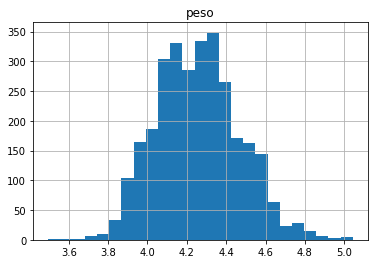

In [22]:
df1.hist(bins = 25)

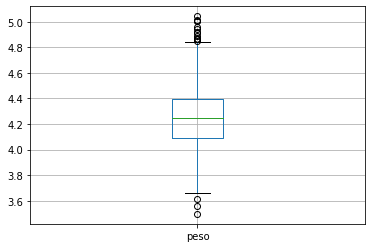

In [23]:
df1.boxplot()

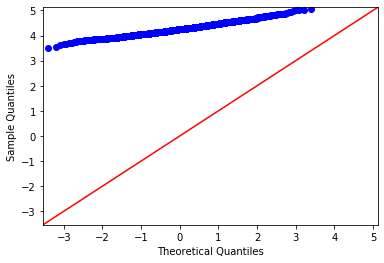

In [24]:
sm.qqplot(df1['peso'], line ='45') 
py.show() 

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [36]:
bra = athletes[athletes['nationality'] == 'BRA'][['height']].dropna().copy()
usa = athletes[athletes['nationality'] == 'USA'][['height']].dropna().copy()
can = athletes[athletes['nationality'] == 'CAN'][['height']].dropna().copy()

In [26]:
bra.mean()

height    1.764034
dtype: float64

In [27]:
usa.mean()

height    1.787768
dtype: float64

In [28]:
can.mean()

height    1.758594
dtype: float64

In [29]:
def q5():
    # Retorne aqui o resultado da questão 5.
    ttest_ind_t , ttest_ind_p = ttest_ind(bra['height'],usa['height'])
    if  (ttest_ind_p > 0.05):
        return True
    return False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [30]:
def q6():
    # Retorne aqui o resultado da questão 6.
    ttest_ind_t , ttest_ind_p = ttest_ind(bra['height'],can['height'])
    if  (ttest_ind_p > 0.05):
        return True
    return False

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [31]:
def q7():
    # Retorne aqui o resultado da questão 7.
    ttest_ind_t , ttest_ind_p = ttest_ind(usa['height'],can['height'],equal_var=False, nan_policy='omit')
    return round(ttest_ind_p, 8).item()

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?